In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
df = pd.read_csv("C:/Users/jssri/Downloads/Data.csv")

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

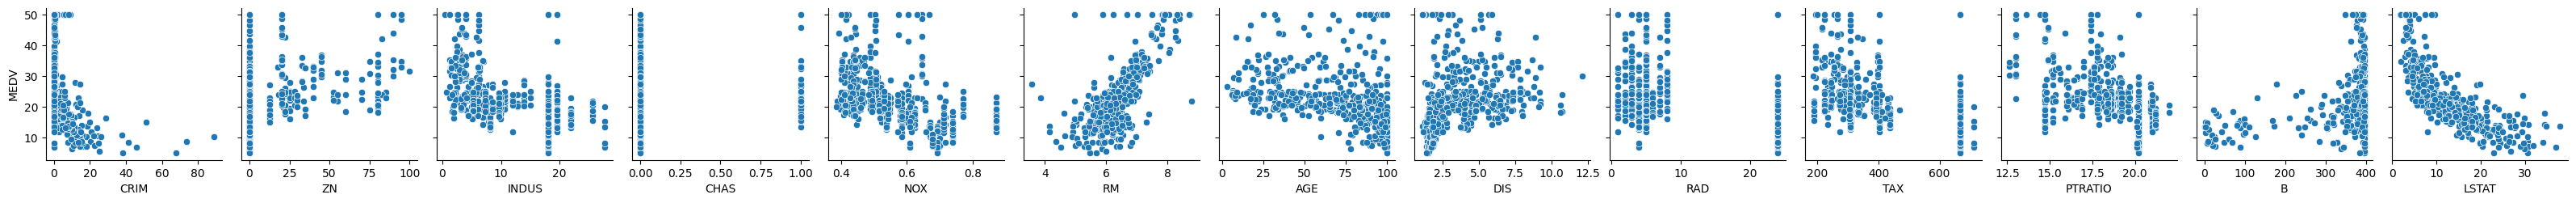

In [13]:
# Analyze the dataset using scatter pair plot
sns.pairplot(df, x_vars=df.drop('MEDV', axis=1).columns, y_vars=['MEDV'])
plt.show()

In [16]:
# Split the data into training and testing sets
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Fit the linear regression model to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the house prices for the testing data using the trained model
y_pred = lr.predict(X_test)

In [20]:
#Accuracy of model
regTrain_score=lr.score(X_train,y_train)*100
regTest_score=lr.score(X_test,y_test)*100
print("Training Accuracy : ",regTrain_score)
print("Testing Accuracy : ",regTest_score)

Training Accuracy :  75.08856358979673
Testing Accuracy :  66.87594935356317


In [22]:
from sklearn import metrics

# Your model evaluation code here
Reg_mse = metrics.mean_squared_error(y_test, y_pred) 
Reg_rmse = np.sqrt(Reg_mse)
Reg_mae = metrics.mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error: ", Reg_mae)
print("Mean Square Error : ", Reg_mse) 
print("Root Mean Square Error : ", Reg_rmse)


Mean Absolute Error:  3.1890919658878416
Mean Square Error :  24.291119474973538
Root Mean Square Error :  4.928602182665339


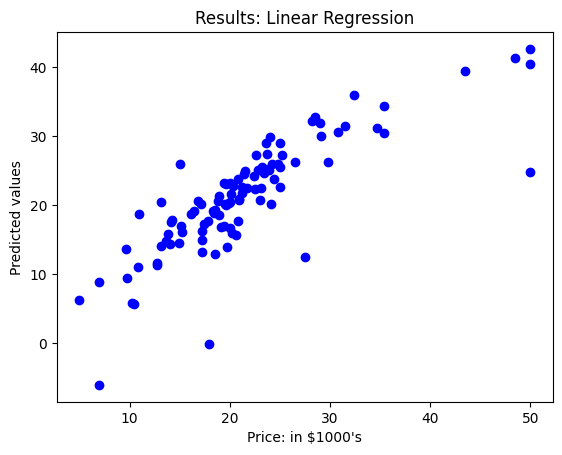

In [24]:
# Plotting Scatter graph to show the results between true values and predicted values
plt.scatter(y_test, y_pred, c = 'blue') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted values") 
plt.title("Results: Linear Regression") 
plt.show() 